9-pikselowy aparat fotograficzny

Proszę przypomnieć sobie z wykładu model 4-pikselowego aparatu (https://git.wmi.amu.edu.pl/pms/zuma/src/branch/master/wyk/4_Sieci_neuronowe.ipynb,  końcówka wykładu).
Warto też zapoznać się z polecanym na wykładzie filmikiem 

https://youtu.be/ILsA4nyG7I0

W analogiczny sposób, wykorzystując fragmenty zalinkowanego kodu, skonstruować model dla 9-pikselowego aparatu. Klasy mogą pozostać te same  ('s', 'v', 'd', 'h'), natomiast zmieni się możliwość ich realizacji (np. dla 'd' będziemy mieć dwa możliwe ułożenia przekątnej i dwie możliwości wyboru koloru). Będzie zatem trzeba w funkcji generującej zbiór danych dodać/zmienić zmienne losowe. Dostosować też będzie trzeba architekturę sieci.

Edit: w ramach realizacji zadania proszę wypróbować różne architektury sieci: liczba warstw, neuronów w warstwie, funkcja aktywacji. Proszę spróbować ustawić początkowe wagi dla przynajmniej jednej warstwy - sprawdzić jak to wpłynie na rezultaty i szybkość uczenia się sieci.
Problem, który sieć rozwiązuje, jest matematycznie jednoznaczny, dlatego po krótkiej zabawie parametrami (albo i wcześniej) sieć powinna mieć accuracy 100%.

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def draw_examples(examples, captions=None):
    plt.figure(figsize=(16, 4))
    m = len(examples)
    for i, example in enumerate(examples):
        plt.subplot(100 + m * 10 + i + 1)
        plt.imshow(example, cmap=plt.get_cmap('gray'))
    plt.show()
    if captions is not None:
        print(6 * ' ' + (10 * ' ').join(str(captions[i]) for i in range(m)))

In [3]:
def generate_example(description):
    variant = random.choice([3, 2, 1, -1, -2, -3])
    variant2 = random.choice([2, 1, -1, -2])
    if description == 's':  # solid
        return (np.array([[1.0,  1.0, 1.0], [1.0,  1.0, 1.0], [1.0,  1.0, 1.0]]) if variant > 0 else
                np.array([[-1.0, -1.0, -1.0], [-1.0, -1.0, -1.0], [-1.0, -1.0, -1.0]]))
    elif description == 'v':  # vertical
        if variant == 1:
            return np.array([[1.0, -1.0, -1.0], [1.0, -1.0, -1.0], [1.0, -1.0, -1.0]])
        elif variant == 2:        
            return np.array([[-1.0, 1.0, -1.0], [-1.0, 1.0, -1.0], [-1.0, 1.0, -1.0]])
        elif variant == 3:
            return np.array([[-1.0, -1.0, 1.0], [-1.0, -1.0, 1.0], [-1.0, -1.0, 1.0]])
        elif variant == -1:
            return np.array([[-1.0, 1.0, 1.0], [-1.0, 1.0, 1.0], [-1.0, 1.0, 1.0]])
        elif variant == -2:
            return np.array([[1.0, -1.0, 1.0], [1.0, -1.0, 1.0], [1.0, -1.0, 1.0]])
        elif variant == -3:
            return np.array([[1.0, 1.0, -1.0], [1.0, 1.0, -1.0], [1.0, 1.0, -1.0]])
    elif description == 'd':  # diagonal
        if variant2 == 1:
            return np.array([[1.0, -1.0, -1.0], [-1.0,  1.0, -1.0], [-1.0,  -1.0, 1.0]])
        elif variant2 == 2:
            return np.array([[-1.0, -1.0, 1.0], [-1.0,  1.0, -1.0], [1.0,  -1.0, -1.0]])
        elif variant2 == -1:
            return np.array([[-1.0, 1.0, 1.0], [1.0,  -1.0, 1.0], [1.0,  1.0, -1.0]])
        elif variant2 == -2:
            return np.array([[1.0, 1.0, -1.0], [1.0,  -1.0, 1.0], [-1.0,  1.0, 1.0]])
    elif description == 'h':  # horizontal
        if variant == 1:
            return np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0], [-1.0, -1.0, -1.0]])
        elif variant == 2:        
            return np.array([[-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]])
        elif variant == 3:
            return np.array([[-1.0, -1.0, -1.0], [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0]])
        elif variant == -1:
            return np.array([[-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])
        elif variant == -2:
            return np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0]])
        elif variant == -3:
            return np.array([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]])
    else:
        return np.array([[random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)],
                         [random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]])

In [4]:
num_classes = 4

trainset_size = 4000
testset_size = 1000

y_train = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(trainset_size)])
x_train = np.array([generate_example(desc) for desc in y_train])

y_test = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(testset_size)])
x_test = np.array([generate_example(desc) for desc in y_test])

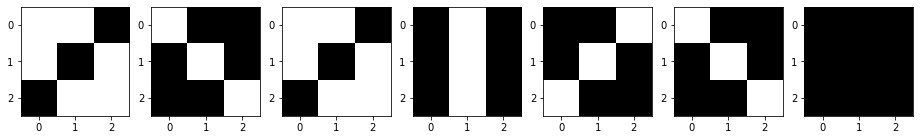

      d          d          d          v          d          d          s


In [5]:
draw_examples(x_train[:7], captions=y_train)

In [6]:
x_train = x_train.reshape(trainset_size, 9)
x_test = x_test.reshape(testset_size, 9)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y_train])
y_test = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y_test])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = keras.Sequential()
model.add(Dense(100, activation='tanh', input_shape=(9,)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(30, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                558       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 76        
Total params: 8,214
Trainable params: 8,214
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [9]:
hidden1 = model.layers[0]
hidden1.name

'dense'

In [10]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.20685486,  0.18078275,  0.19417189,  0.01896809, -0.1811312 ,
         0.1576974 ,  0.00612392, -0.12502176,  0.1796125 , -0.10635997,
         0.04589431, -0.06922239,  0.05061905,  0.06163858,  0.09057014,
         0.05591331, -0.08309852,  0.19265912, -0.0391812 ,  0.06508695,
        -0.1311709 ,  0.11974867, -0.04719418,  0.1837941 , -0.00197756,
         0.14640255, -0.13960168,  0.22974871, -0.14851862, -0.00164713,
        -0.13274102, -0.05961531,  0.0360585 , -0.03863771, -0.17095086,
        -0.04844791,  0.19023685,  0.10988514,  0.20349608,  0.21517886,
         0.0429544 ,  0.10030217,  0.12162496,  0.1215234 ,  0.16123106,
         0.114435  , -0.02382565, -0.00239193, -0.09470055,  0.06319   ,
        -0.12944569, -0.2024872 , -0.09907793,  0.0733446 , -0.01348378,
        -0.04561502,  0.16594039, -0.20978609, -0.05061632,  0.11731307,
        -0.16446151,  0.05878063, -0.01977724, -0.0748539 ,  0.11034356,
         0.15521969,  0.03492261,  0.00282484,  0.0

In [11]:
weights.shape

(9, 100)

In [12]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [13]:
biases.shape

(100,)

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=17, validation_data=(x_test, y_test))

Epoch 1/17
125/125 [==============================] - 3s 6ms/step - loss: 1.3004 - accuracy: 0.4865 - val_loss: 1.2213 - val_accuracy: 0.6540
Epoch 2/17
125/125 [==============================] - 1s 4ms/step - loss: 1.1671 - accuracy: 0.6195 - val_loss: 1.1205 - val_accuracy: 0.6540
Epoch 3/17
125/125 [==============================] - 1s 4ms/step - loss: 1.0785 - accuracy: 0.6593 - val_loss: 1.0438 - val_accuracy: 0.6890
Epoch 4/17
125/125 [==============================] - 1s 4ms/step - loss: 1.0078 - accuracy: 0.7225 - val_loss: 0.9806 - val_accuracy: 0.7920
Epoch 5/17
125/125 [==============================] - 0s 4ms/step - loss: 0.9453 - accuracy: 0.7935 - val_loss: 0.9229 - val_accuracy: 0.8530
Epoch 6/17
125/125 [==============================] - 1s 4ms/step - loss: 0.8886 - accuracy: 0.8390 - val_loss: 0.8702 - val_accuracy: 0.8850
Epoch 7/17
125/125 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.8830 - val_loss: 0.8213 - val_accuracy: 0.9280
Epoch 

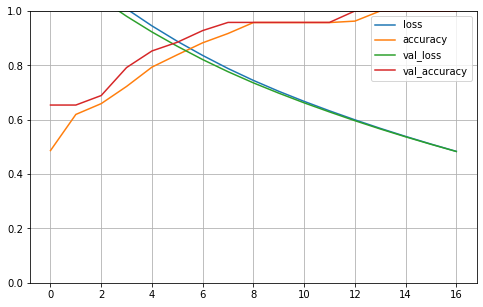

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Wyznacza zakres osi pionowej od 0 do 1
plt.show()

In [17]:
# 's': 0, 'v': 1, 'd': 2, 'h': 3

In [18]:
model.predict([np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0]]).reshape(1, 9)])

array([[0.26873285, 0.05365775, 0.11426891, 0.5633405 ]], dtype=float32)

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.4830961227416992
Test accuracy: 1.0


In [20]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)

In [21]:
with printoptions(precision=1, suppress=True):
    for layer in model.layers:
        print(layer.get_weights())

[array([[ 0.2,  0.2,  0.2,  0. , -0.2,  0.2, -0. , -0.1,  0.2, -0.1,  0.1,
        -0.1,  0. ,  0.1,  0.1,  0. , -0.1,  0.2, -0.1,  0. , -0.2,  0.1,
        -0. ,  0.2, -0. ,  0.1, -0.1,  0.2, -0.1, -0. , -0.2, -0.1,  0. ,
        -0.1, -0.2, -0.1,  0.2,  0.1,  0.2,  0.2,  0.1,  0.1,  0.2,  0.1,
         0.2,  0.1, -0. ,  0. , -0.1,  0.1, -0.1, -0.2, -0.1,  0.1, -0. ,
        -0.1,  0.2, -0.2, -0.1,  0.1, -0.2,  0.1,  0. , -0.1,  0.2,  0.2,
         0.1, -0. ,  0. , -0. , -0.1, -0.2,  0.1, -0.2,  0.3, -0.2,  0.2,
         0. , -0.1,  0.1,  0.1,  0.1, -0. , -0.1,  0. , -0.1,  0.1,  0. ,
        -0.1,  0. ,  0.1, -0.2,  0.1, -0.3,  0.1,  0. , -0.2,  0. , -0.2,
        -0.1],
       [ 0.1, -0. , -0.2, -0. ,  0.2,  0.1, -0.1, -0.2, -0.1, -0.1, -0. ,
         0.1, -0.1,  0.1, -0.2,  0.1, -0.1,  0.2, -0.1, -0.2,  0.2,  0.1,
         0.2,  0.1, -0. , -0.1,  0.1, -0. ,  0. , -0.1, -0.1,  0.2,  0.1,
        -0.1,  0.2,  0.1, -0. ,  0.2,  0. ,  0.1,  0.2, -0.1,  0.2, -0.1,
        -0. ,  0.2, -0